# Árboles de decisión, caso de regresión 

En **regresión con árboles de decisión (`DecisionTreeRegressor`)**, el algoritmo **busca la división (split) que maximice la reducción de varianza** en cada nodo. 

---

## ¿Cómo elige los splits el árbol en regresión?
El algoritmo recorre **todas las características** y **todos los posibles umbrales** de división. Luego, selecciona **el umbral que cause la mayor reducción de varianza**.

Como la mayoría de los modelos de regresión, la función de perdida es el error cuadrático medio 

$$ Loss = \frac{1}{n} \sum(y_i - \hat{y}) ^2 $$

En la literatura de árboles de decisión a esta perdida simplemente se le conoce como varianza 

### **Proceso paso a paso**:

1. **Para cada característica $j$**:
   - Ordena los valores de $j$ de menor a mayor.
   - Prueba todas las divisiones posibles en los puntos medios entre valores consecutivos.

2. **Para cada posible umbral de división** $t$, divide los datos en dos grupos:
   - **Grupo Izquierdo:** $x_j \leq t$
   - **Grupo Derecho:** $x_j > t$

3. **Calcula la reducción de varianza** para cada umbral $t$:

$$
\text{Reducción de varianza} = \text{Varianza total} - \left( \frac{N_1}{N} \times \text{Var}(G1) + \frac{N_2}{N} \times \text{Var}(G2) \right)
$$

4. **Elige el umbral $t$ que maximiza la reducción de varianza**.

5. **Repite este proceso recursivamente** en cada nuevo nodo hasta cumplir una condición de parada (profundidad máxima, mínimo de muestras, etc.).

---

## **Ejemplo gráfico**

¿Cuál seria la mejor segmentación?

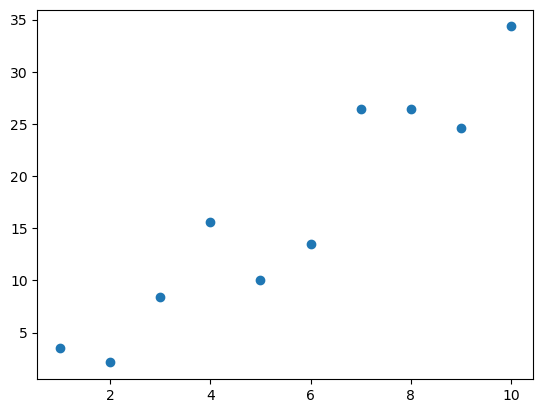

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np


np.random.seed(42)  # Para reproducibilidad
X = np.linspace(1, 10, 10)
y = X**1.5 + np.random.normal(scale=5, size=len(X))

plt.scatter(X, y)

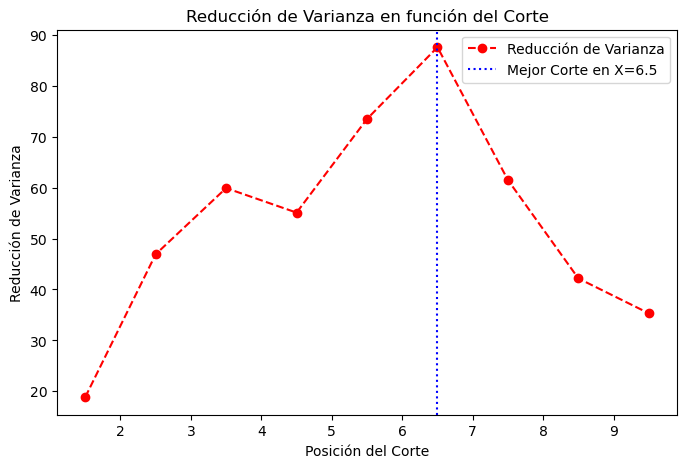

Mejor punto de corte: 6.5, Reducción máxima de varianza: 87.55047418105237


In [2]:
# Función para encontrar la reducción de varianza en cada corte
def calcular_varianza_por_corte(X, y):
    cortes_posibles = [(X[i - 1] + X[i]) / 2 for i in range(1, len(X))]
    reducciones_varianza = []

    for corte in cortes_posibles:
        izquierda_y = y[X < corte]
        derecha_y = y[X >= corte]

        # Calcular la varianza total
        varianza_total = np.var(y, ddof=0)
        varianza_izquierda = np.var(izquierda_y, ddof=0) if len(izquierda_y) > 0 else 0
        varianza_derecha = np.var(derecha_y, ddof=0) if len(derecha_y) > 0 else 0

        # Calcular la reducción de varianza
        varianza_reducida = varianza_total - (
            (len(izquierda_y) / len(y)) * varianza_izquierda +
            (len(derecha_y) / len(y)) * varianza_derecha
        )
        reducciones_varianza.append(varianza_reducida)

    return cortes_posibles, reducciones_varianza

# Calcular la varianza en función del corte
cortes_posibles, reducciones_varianza = calcular_varianza_por_corte(X, y)

# Encontrar el mejor corte (el que maximiza la reducción de varianza)
mejor_corte = cortes_posibles[np.argmax(reducciones_varianza)]

# Graficar la reducción de varianza en función del corte
plt.figure(figsize=(8, 5))
plt.plot(cortes_posibles, reducciones_varianza, marker="o", linestyle="dashed", color="red", label="Reducción de Varianza")
plt.axvline(x=mejor_corte, color="blue", linestyle="dotted", label=f"Mejor Corte en X={mejor_corte}")
plt.xlabel("Posición del Corte")
plt.ylabel("Reducción de Varianza")
plt.title("Reducción de Varianza en función del Corte")
plt.legend()
plt.show()

# Mostrar el mejor corte y la reducción de varianza máxima
print(f"Mejor punto de corte: {mejor_corte}, Reducción máxima de varianza: {max(reducciones_varianza)}")


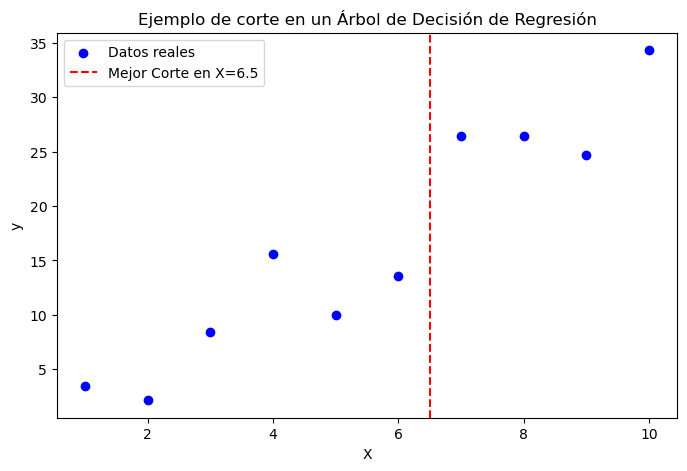

In [3]:
# Generar datos NO lineales (patrón en segmentos)
# Visualizar los datos y el mejor punto de corte
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Datos reales")
plt.axvline(x=mejor_corte, color="red", linestyle="dashed", label=f"Mejor Corte en X={mejor_corte}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ejemplo de corte en un Árbol de Decisión de Regresión")
plt.legend()
plt.show()



### Aplicación dataset de casas

In [16]:

housing = pd.read_csv('Data/housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

plot_tree(model, feature_names=['median_income'], filled=True, rounded=True)

In [17]:
# Selecciona una sola variable
X_train = X_train[['median_income']]

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

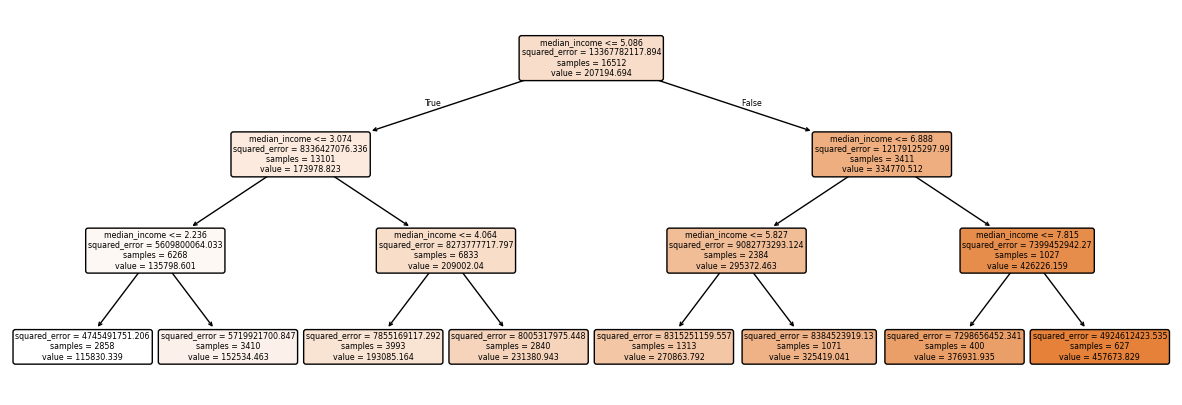

In [18]:
### Otra forma de visualizar el árbol
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=['median_income'], filled=True, rounded=True)
plt.show()

In [19]:
X_test = X_test[['median_income']]
tree.predict(X_test)

array([115830.33904829, 152534.46334311, 193085.16378663, ...,
       457673.82934609, 152534.46334311, 193085.16378663])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



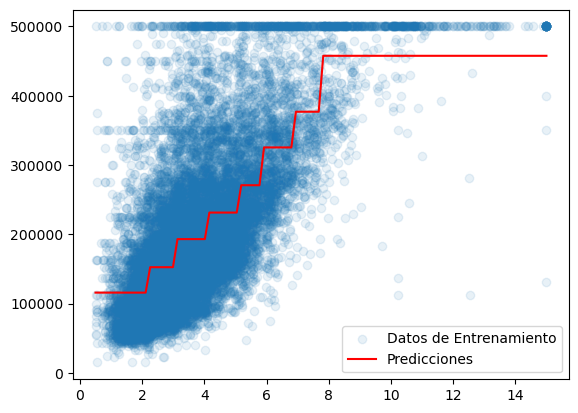

In [22]:
X1 = np.linspace(X_test.min(), X_test.max(), 100)
predicciones_ordenadas = tree.predict(X1)

plt.scatter(X_train, y_train, label='Datos de Entrenamiento', alpha=0.1)
plt.plot(X1, predicciones_ordenadas, color='red', label='Predicciones')
plt.legend()

### 2 variables

median_income y housing_median_age


In [15]:
import plotly.graph_objects as go
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Seleccionar dos variables predictoras
X = housing[['median_income', 'housing_median_age']].values
y = housing['median_house_value'].values

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión
tree_regressor_3d = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor_3d.fit(X_train, y_train)

# Crear una malla de valores para predecir
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
Z_pred = tree_regressor_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)

# Crear la figura interactiva
fig = go.Figure()

# Agregar los datos reales como scatter 3D
fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y,
    mode='markers',
    marker=dict(size=3, color='blue', opacity=0.5),
    name="Datos reales"
))

# Agregar la superficie de predicción del árbol de decisión
fig.add_trace(go.Surface(
    x=x_range, y=y_range, z=Z_pred,
    colorscale="viridis",
    opacity=0.7,
    name="Predicción del Árbol"
))

# Configuración de ejes
fig.update_layout(
    title="Árbol de Decisión - Visualización Interactiva en 3D",
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Housing Median Age",
        zaxis_title="Median House Value"
    )
)

# Mostrar el gráfico interactivo
fig.show()


In [23]:
housing = pd.read_csv('Data/housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Usando todas las variables

In [11]:
# Seleccionar dos variables predictoras


In [12]:
# Grafica el árbol


### Seleccionando el mejor árbol

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [27]:
pipeline = Pipeline([
     ('tree', DecisionTreeRegressor())
])
params = {
     'tree__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
}

grid_tree = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, n_jobs=-1, scoring="r2")
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12]},
             scoring='r2')

In [13]:
### Cual gana


### Interpretando el modelo

$Varianza = \frac{1}{n} \sum(y_i - \hat{y}) ^2 $

Ejemplo de un solo split:

```
Inicia así
y = [200, 210, 250, 270, 300, 350, 400]

varianza total = 4563.27

Árbol hace este split
Grupo 1: [200, 210, 250] 
Grupo 2: [270, 300, 350, 400] 
```
$Var(grupo1) = 466.67$

$Var(grupo2) = 2450$

La reduccion de varianza sería

$$
\text{Reducción de varianza} = \text{Varianza antes} - \left( \frac{N_1}{N} \times \text{Varianza Grupo 1} + \frac{N_2}{N} \times \text{Varianza Grupo 2} \right)
$$

Es decir 
$$
\text{Reducción de varianza} = 4563.27 - \left( \frac{3}{7} \times 466.67 + \frac{4}{7} \times 2450 \right) = 2963.27
$$

Pasos para calcular la importancia de las variables:
- Calculamos esta reducción en todos los splits
- Juntamos todos los splits de una sola variable
- Sumamos la reducción total de varianza
- Dividimos el acumulado de cada variable entre la suma total para que cada variable este entre 0 y 1

best_model = grid_tree.best_estimator_.named_steps['tree']



In [14]:
# Obtener el mejor modelo entrenado dentro de GridSearchCV


### Ventajas árboles de decisión
- Son muy intuitivos y fáciles de explicar
- Junto con la regresión lógistica es de los pocos algoritmos que se puede interpretar con fácilidad
- No necesita escalarse

### Deventajas de árboles de decisión
- Su poder predictivo no es tan bueno
- A diferencia de la regresión lógistica, este es muy propenso a overfitting
